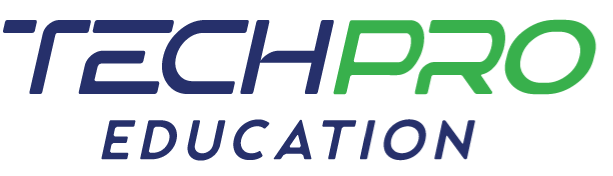

# Hierarchical Clustering

**General cluster logic**: Minimum distance between observations within a cluster, maximum distance between clusters. The main principle is tight cohesion(unity and closeness) within the cluster and maximum separation from other clusters.

Not Used as frequently as K Means

**Unlike K-Means, we will start by creating a dendrogram before defining any model. With K-Means, we started by defining a model even with default values.**

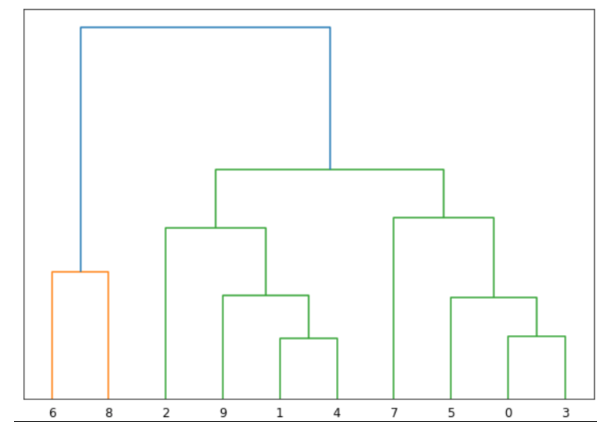

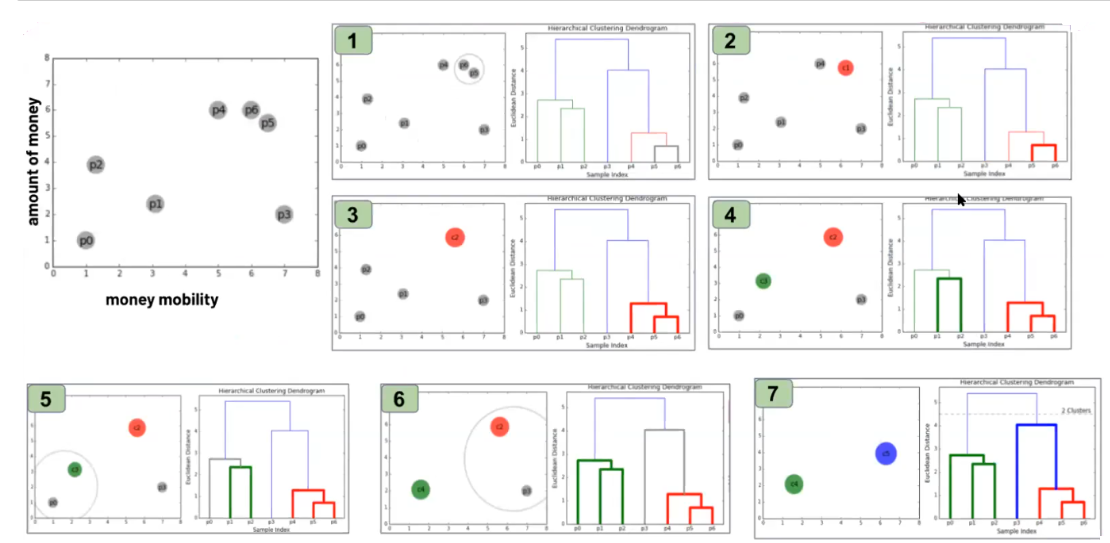

Hierarchical clustering is divided into two main approaches:

**Agglomerative (Bottom-Up) Approach**: In this method, each data point starts as its own cluster. Then, these clusters are merged step-by-step based on their similarity. This process continues until all data points are combined into a single cluster. Similarity measures are usually based on distance metrics (e.g., Euclidean distance).

**Divisive (Top-Down) Approach**: In this approach, all data points start as a single large cluster. Then, this large cluster is progressively split into smaller clusters. This process continues until each data point is in its own cluster or until a specific criterion is met.

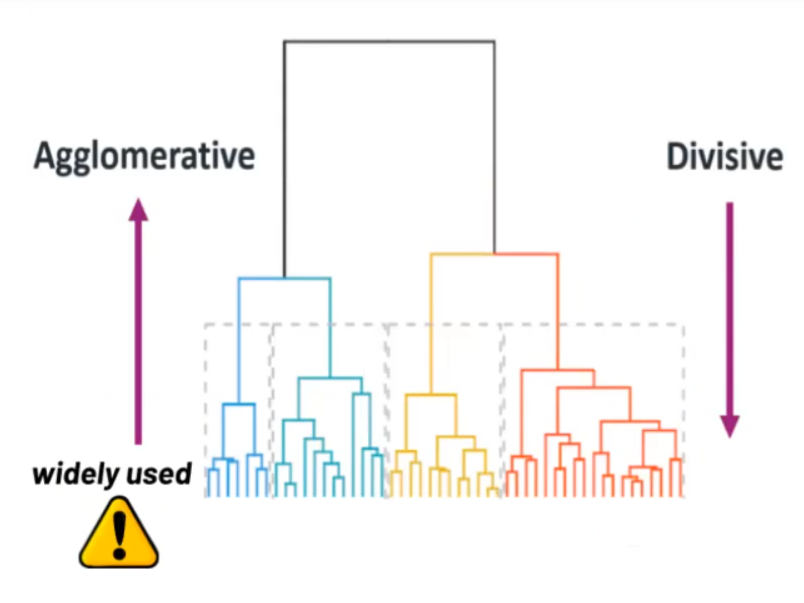

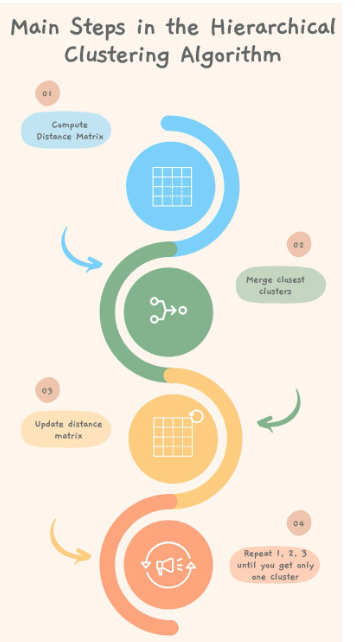

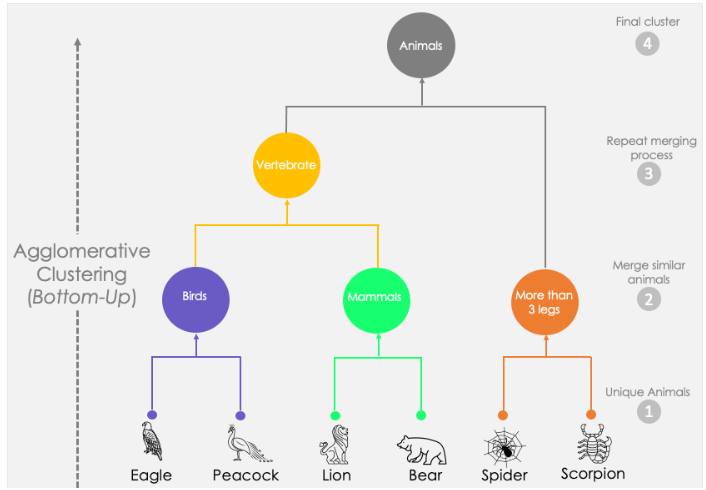

### How to read the Dendrograms?

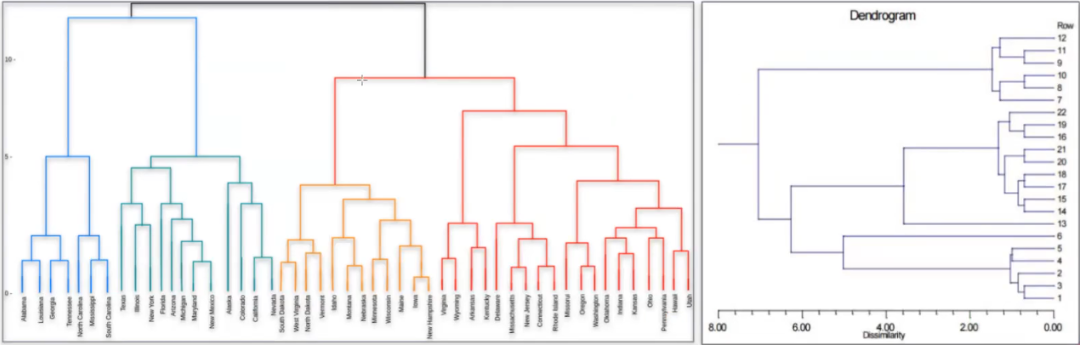

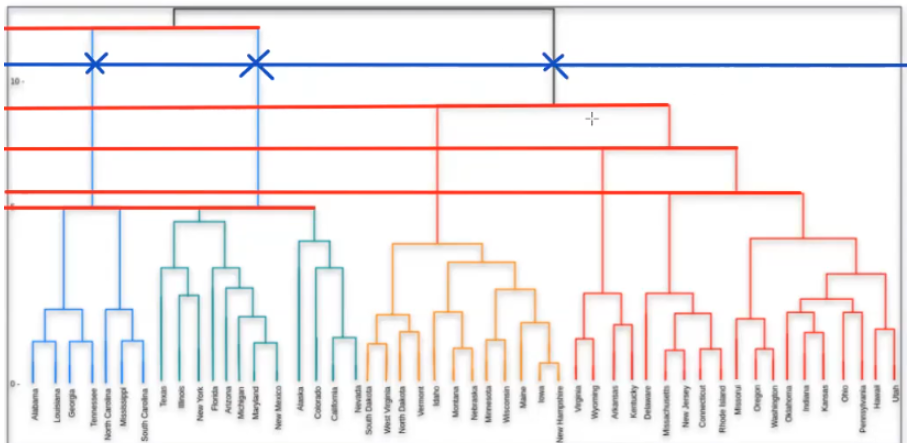

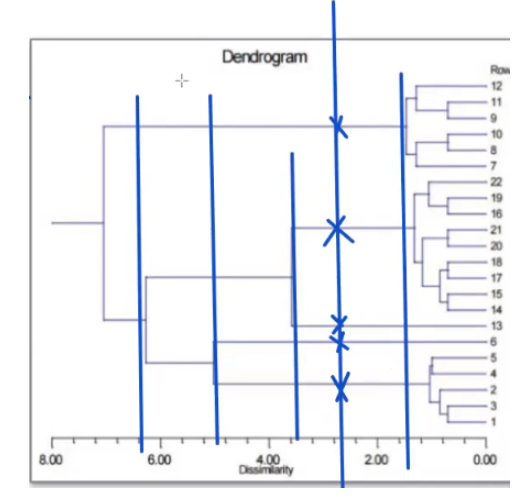

- **Lines are drawn across the divisions**: Lines are drawn to represent the divisions in the dendrogram.
- **Find the widest gap**: Identify the widest gap between clusters in the dendrogram.
- **Draw a line across the widest gap**: When a line is drawn across the widest gap, the number of lines it intersects determines the number of clusters to be chosen.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# To display plots inline in the notebook
%matplotlib inline                        
# %matplotlib notebook                     # To zoom into plots
plt.rcParams["figure.figsize"] = (10,6)   # Standard size for plots
import warnings                           # To manage warning messages
warnings.filterwarnings("ignore")         # Ignore unwanted unnecessary messages
warnings.warn("this will not show")
# pd.set_option('display.float_format', lambda x: '%.3f' % x)


In [2]:
df = pd.read_csv("iris_1.csv")   # there is no species feature in iris-1 data set..
df.head()

sepal_length  sepal_width  petal_length  petal_width
0           5.1          3.5           1.4          0.2
1           4.9          3.0           1.4          0.2
2           4.7          3.2           1.3          0.2
3           4.6          3.1           1.5          0.2
4           5.0          3.6           1.4          0.2

## Exploratory Data Analysis and Visualization

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [4]:
df.describe().T

count      mean       std  min  25%   50%  75%  max
sepal_length  150.0  5.843333  0.828066  4.3  5.1  5.80  6.4  7.9
sepal_width   150.0  3.057333  0.435866  2.0  2.8  3.00  3.3  4.4
petal_length  150.0  3.758000  1.765298  1.0  1.6  4.35  5.1  6.9
petal_width   150.0  1.199333  0.762238  0.1  0.3  1.30  1.8  2.5

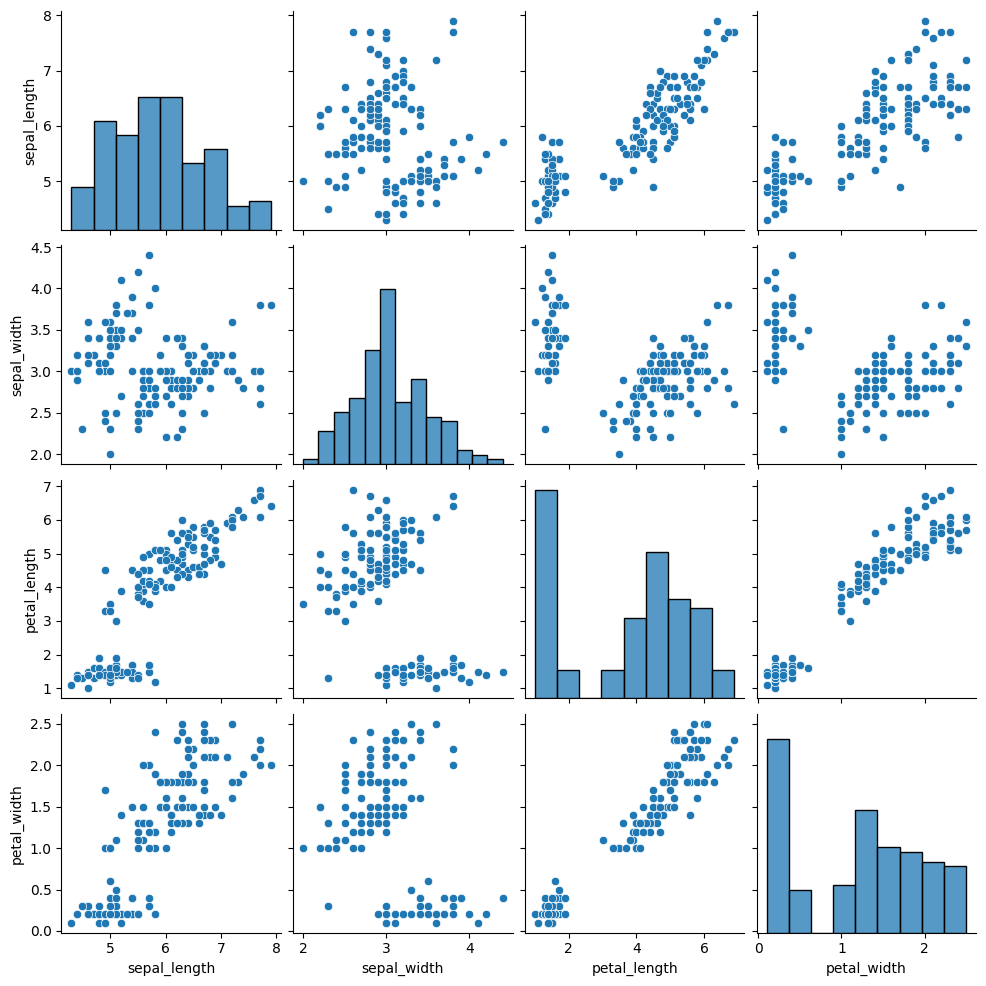

In [5]:
sns.pairplot(df);

## Scaling Data

**Scaling in Hierarchical Clustering**: Scaling is often important in hierarchical clustering, especially if there are large differences in scale among your variables.

For the Iris dataset, scaling is not necessary because all features are measured in centimeters, and therefore they are already on similar scales.

The image below shows the results of different scaling scenarios.

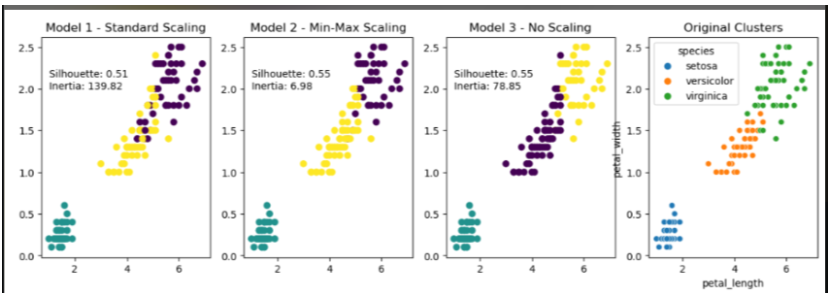

Below, we will proceed with the unscaled version.

## Hopkins Test

In summary, the Hopkins test helps evaluate whether a dataset exhibits a random distribution and, in this context, whether clustering is appropriate. For clustering, **a value below 0.5 is acceptable, but a value of 0.3 or lower is more expected.**

In [6]:
# pip install scikit-learn   (or  # pip install sklearn)

In [4]:
from sklearn.neighbors import BallTree
import numpy as np
import pandas as pd
def hopkins(data_frame, sampling_size):
    """Assess the clusterability of a dataset. A score between 0 and 1, a score around 0.5 express
    no clusterability and a score tending to 0 express a high cluster tendency.
    Parameters
    ----------
    data_frame : numpy array
        The input dataset
    sampling_size : int
        The sampling size which is used to evaluate the number of DataFrame.
    Returns
    ---------------------
    score : float
        The hopkins score of the dataset (between 0 and 1)
    Examples
    --------
    >>> from sklearn import datasets
    >>> from pyclustertend import hopkins
    >>> X = datasets.load_iris().data
    >>> hopkins(X,150)
    0.16
    """
    if type(data_frame) == np.ndarray:
        data_frame = pd.DataFrame(data_frame)
    # Sample n observations from D : P
    if sampling_size > data_frame.shape[0]:
        raise Exception(
            'The number of sample of sample is bigger than the shape of D')
    data_frame_sample = data_frame.sample(n=sampling_size)
    # Get the distance to their neirest neighbors in D : X
    tree = BallTree(data_frame, leaf_size=2)
    dist, _ = tree.query(data_frame_sample, k=2)
    data_frame_sample_distances_to_nearest_neighbours = dist[:, 1]
    # Randomly simulate n points with the same variation as in D : Q.
    max_data_frame = data_frame.max()
    min_data_frame = data_frame.min()
    uniformly_selected_values_0 = np.random.uniform(min_data_frame[0], max_data_frame[0], sampling_size)
    uniformly_selected_values_1 = np.random.uniform(min_data_frame[1], max_data_frame[1], sampling_size)
    uniformly_selected_observations = np.column_stack((uniformly_selected_values_0, uniformly_selected_values_1))
    if len(max_data_frame) >= 2:
        for i in range(2, len(max_data_frame)):
            uniformly_selected_values_i = np.random.uniform(min_data_frame[i], max_data_frame[i], sampling_size)
            to_stack = (uniformly_selected_observations, uniformly_selected_values_i)
            uniformly_selected_observations = np.column_stack(to_stack)
    uniformly_selected_observations_df = pd.DataFrame(uniformly_selected_observations)
    # Get the distance to their neirest neighbors in D : Y
    tree = BallTree(data_frame, leaf_size=2)
    dist, _ = tree.query(uniformly_selected_observations_df, k=1)
    uniformly_df_distances_to_nearest_neighbours = dist
    # return the hopkins score
    x = sum(data_frame_sample_distances_to_nearest_neighbours)
    y = sum(uniformly_df_distances_to_nearest_neighbours)
    if x + y == 0:
        raise Exception('The denominator of the hopkins statistics is null')
    return x / (x + y)[0]

# Normally, this function is available in the pyclustertend library. However, to avoid potential errors,
# we will use the function directly. Therefore, there is no need to install pyclustertend!

In [5]:
X =df.copy()

In [6]:
hopkins(X, X.shape[0])

0.16328491903990403

Since the result is less than 0.3, it indicates a good tendency for clustering.

## Dendrogram

Unlike K-Means, we can see the ideal number of clusters using a dendrogram without creating any model. The approach can be either inductive or deductive.

In [8]:
from scipy.cluster.hierarchy import dendrogram, linkage

The linkage function is used to create clusters, while the dendrogram is used to draw the graph.

- The dendrogram is used to visualize the results of hierarchical clustering. It takes the output of a hierarchical clustering model and draws a dendrogram (a tree-like diagram). This diagram shows how data points are grouped and the hierarchical structure of this grouping. It illustrates which data points were merged first, at which levels these mergers occurred, and how all data points were eventually combined into a single cluster. This is a useful tool for evaluating and understanding different numbers of clusters.

- The `linkage` function performs  clustering on the data. It takes a given dataset and creates a hierarchical clustering by merging the two closest clusters at each step. This function can use different merging methods (linkage methods), such as 'single', 'complete', 'average', 'ward', etc. These methods calculate similarity or distance measures between clusters in different ways and group data points accordingly. The output of the function is a matrix containing the sequence and levels of the merging operations, which can be visualized using the `dendrogram` function.hierarchical

**“linkage” parameter: (default= “ward”)**

{‘ward’, ‘complete’, ‘average’, ‘single’}

Determines which linkage criterion to use. The linkage criterion specifies the distance measure used to determine the distance between clusters.

- **Ward**: Minimizes the variance of the merged clusters.
- **Average**: Uses the average of the distances between each pair of observations in the two clusters.
- **Complete** (or maximum linkage): Uses the maximum distance between any pair of observations in the two clusters.
- **Single**: Uses the minimum distance between any pair of observations in the two clusters.

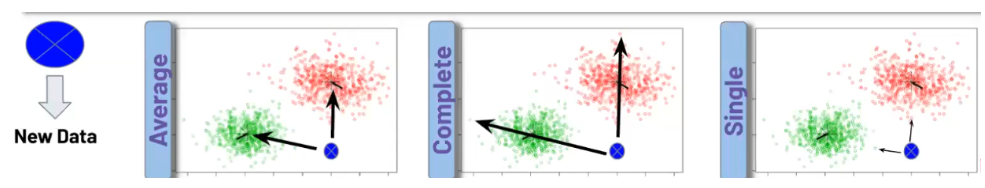

In [1]:
# `dendrogram()`   # Provides the features that can be used to generate a dendrogram plot

In [10]:
hc_ward = linkage(y= X, method="ward") # According to variance - performs the linkage in a way that minimizes changes in variance within clusters.

hc_complete = linkage(X, "complete") # According to the furthest point - assigns the new point based on the maximum distance to the farthest points in existing clusters.

hc_average = linkage(X, "average") # According to the average - measures the new point's distance by averaging the distances within all clusters.

hc_single = linkage(X, "single") # According to the nearest point - assigns the new point to the cluster with the smallest distance to the nearest points within existing clusters.

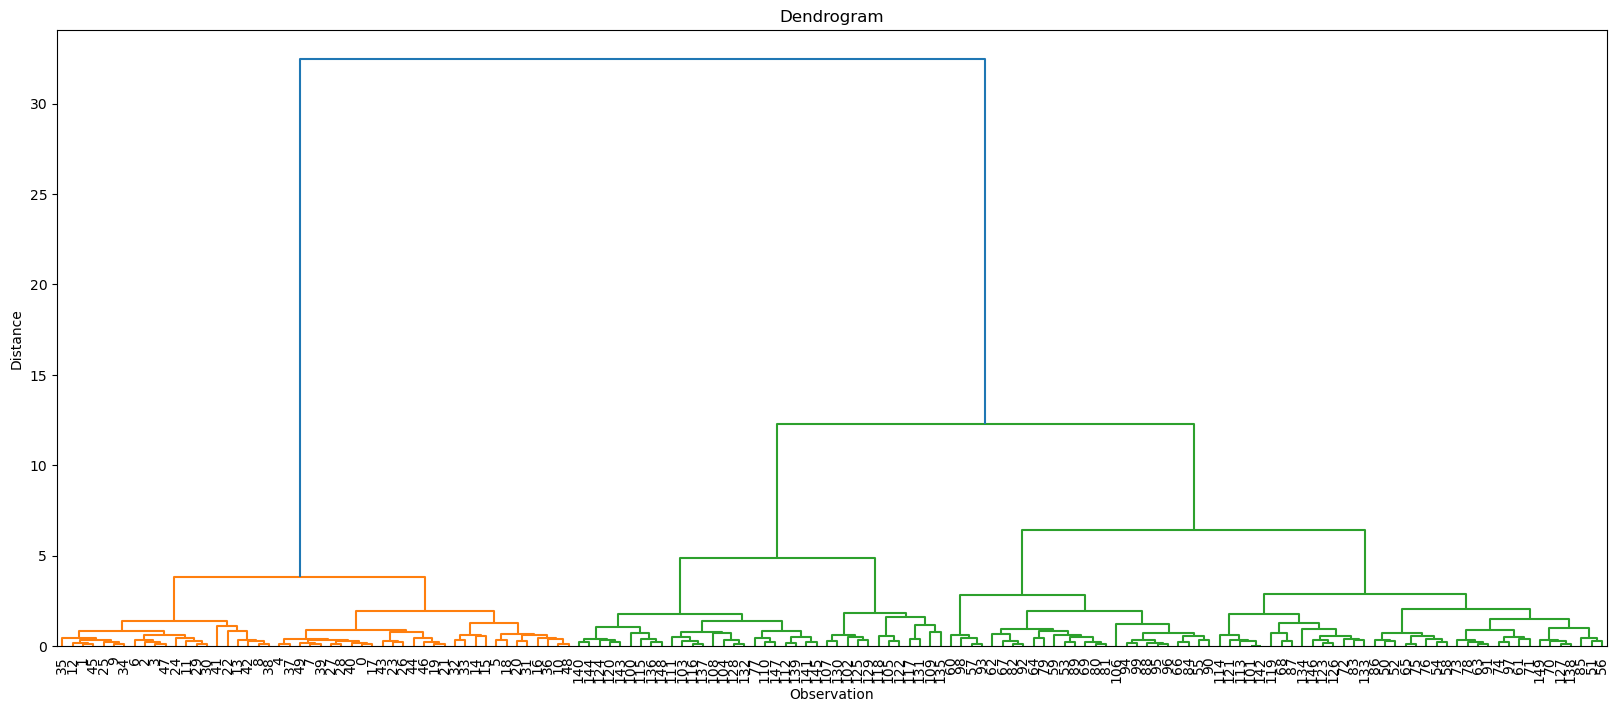

In [11]:
# Let's create the dendrogram according to the above linkage calculation

plt.figure(figsize=(20, 8))
plt.title("Dendrogram")
plt.xlabel("Observation")
plt.ylabel("Distance")
dendrogram(hc_ward, leaf_font_size=10);  # Creating a dendrogram using the 'ward' linkage method


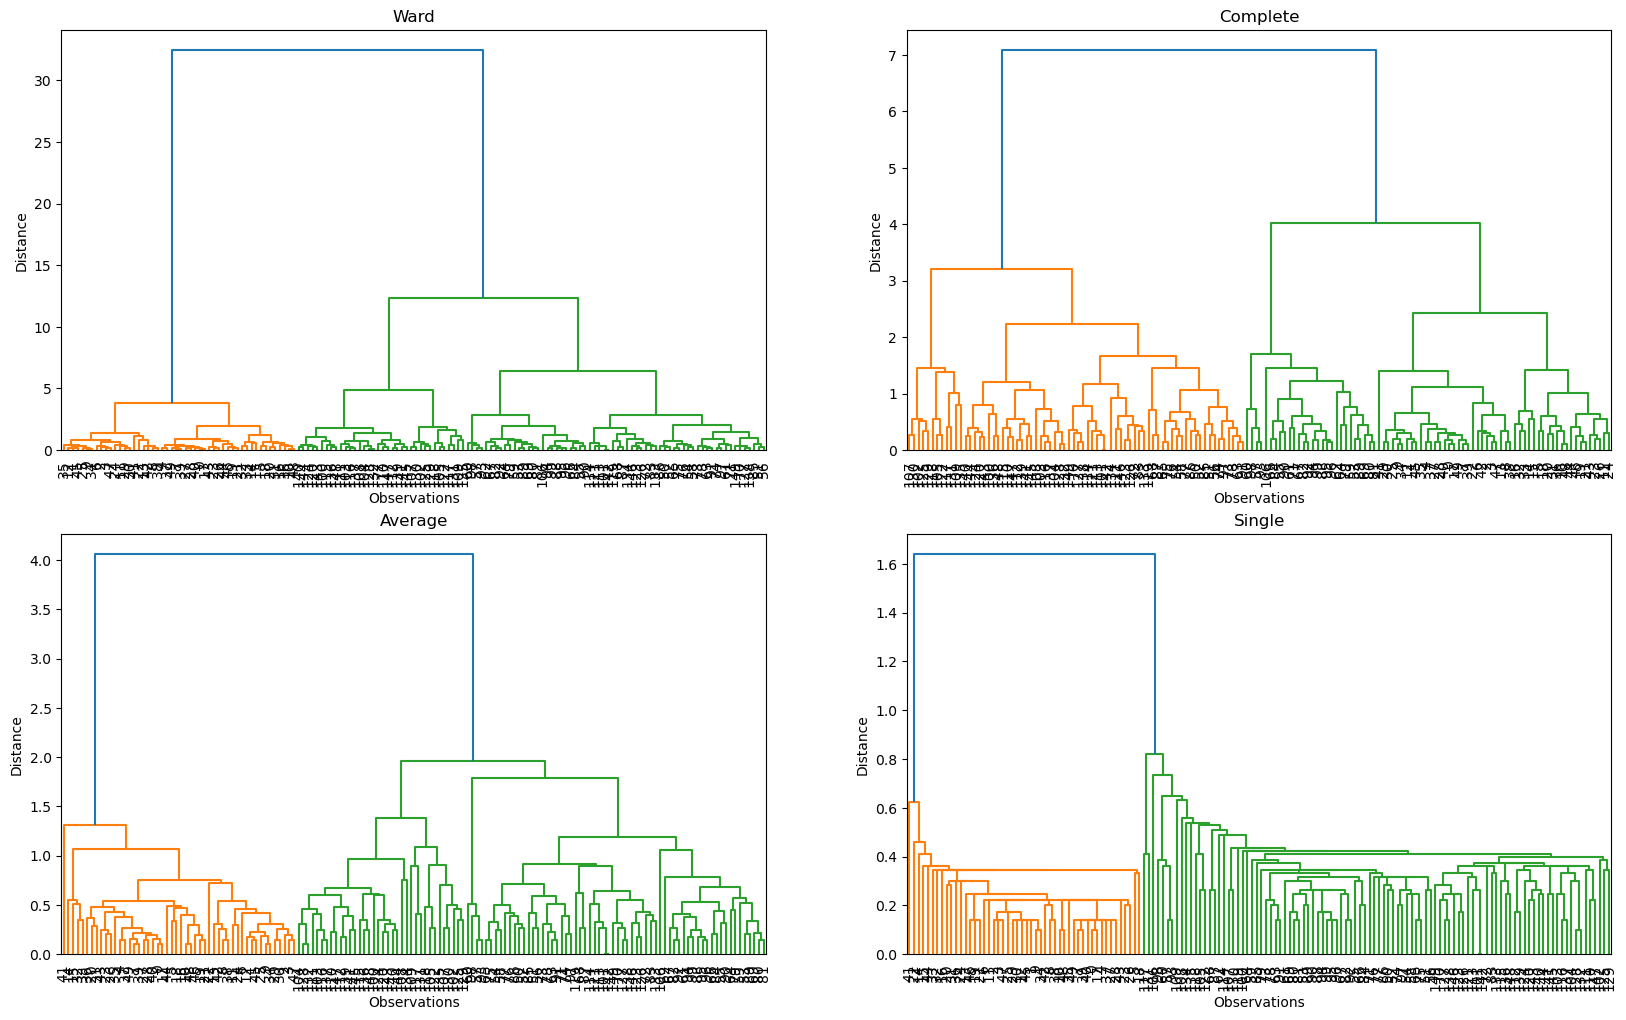

In [12]:
# dendrogram plot based on all methods 

plt.figure(figsize = (20,12))

plt.subplot(221)
plt.title("Ward")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_ward, leaf_font_size = 10)

plt.subplot(222)
plt.title("Complete")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_complete, leaf_font_size = 10)

plt.subplot(223)
plt.title("Average")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_average, leaf_font_size = 10)

plt.subplot(224)
plt.title("Single")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_single, leaf_font_size = 10);

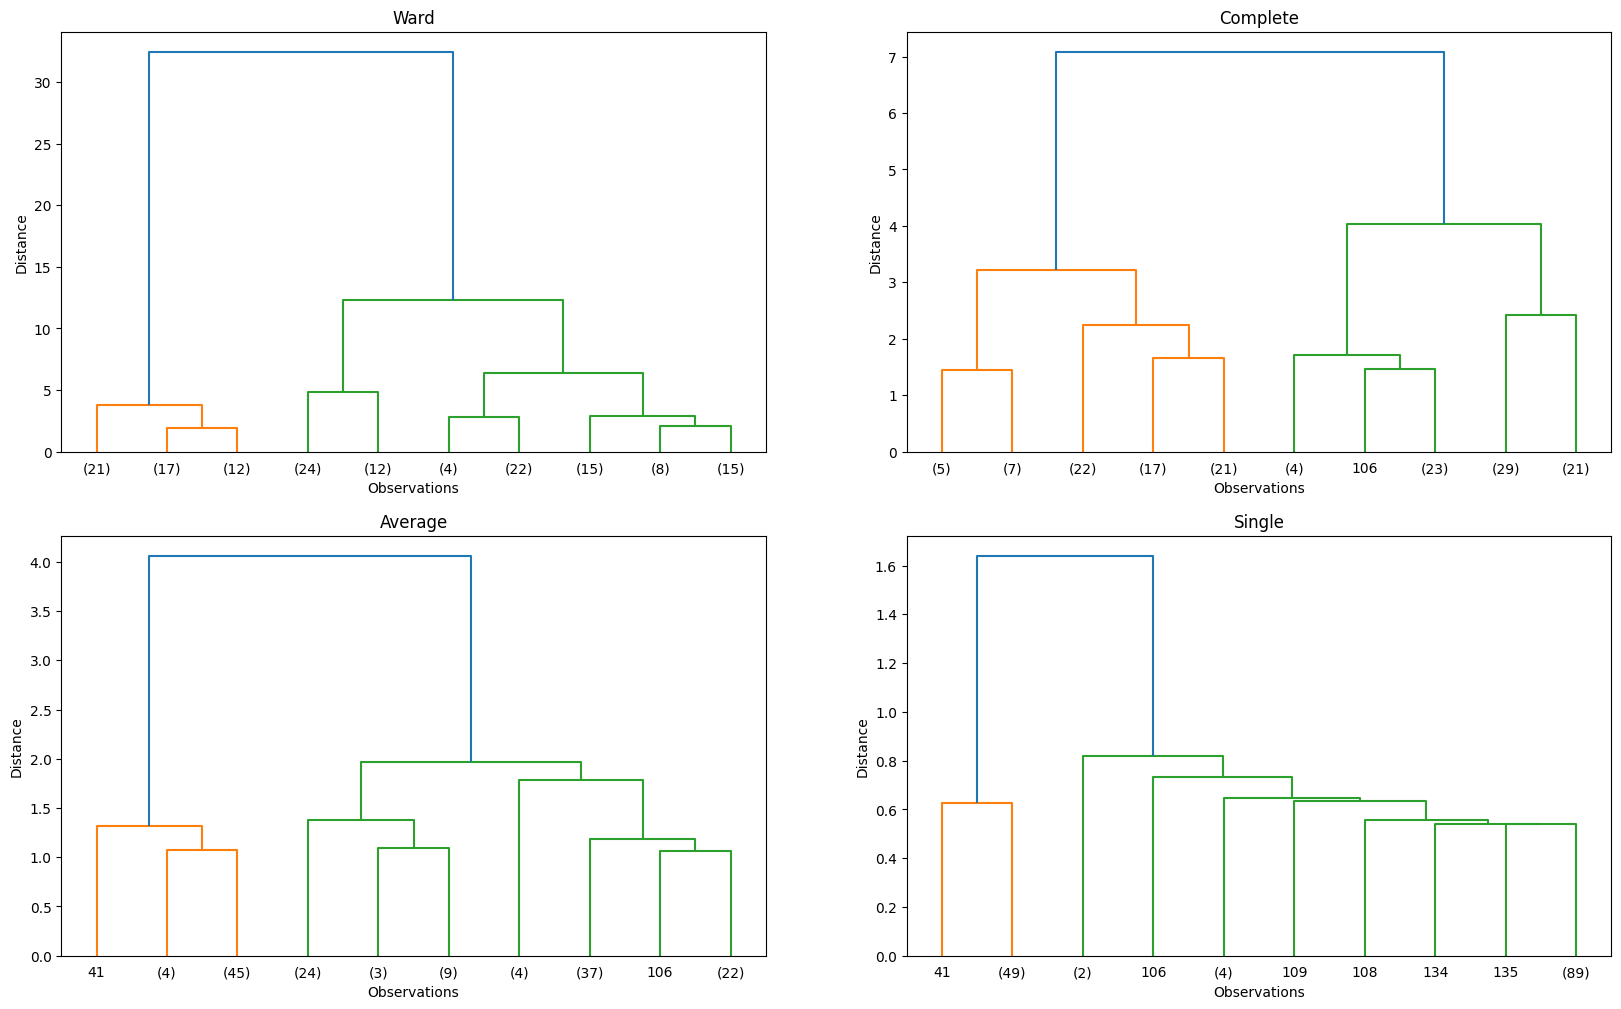

In [15]:
# let's simplify the graphics

plt.figure(figsize = (20,12))

plt.subplot(221)
plt.title("Ward")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_ward, leaf_font_size = 10, truncate_mode='lastp', p=10)

plt.subplot(222)
plt.title("Complete")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_complete, leaf_font_size = 10, truncate_mode='lastp', p=10)

plt.subplot(223)
plt.title("Average")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_average, leaf_font_size = 10, truncate_mode='lastp', p=10)

plt.subplot(224)
plt.title("Single")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_single, leaf_font_size = 10, truncate_mode='lastp' , p=10);  # p the number of clusers created in last branches

## Hierarchical Clustering (Agglomerative)

In [13]:
from sklearn.cluster import AgglomerativeClustering

**NOTE**: Although the dendrograms above suggest 2 clusters, we will proceed with 3 clusters as advised by the expert.

**Some important features of the AgglomerativeClustering class:**

- **Merging Strategy**: Agglomerative hierarchical clustering initially considers each data point as its own cluster and then incrementally merges the two most similar clusters. This process continues until a specified number of clusters is reached or another stopping criterion is met.

- **Distance Metric**: AgglomerativeClustering uses various strategies to measure the similarity or distance between clusters. These include merging methods such as 'ward', 'complete', 'average', and 'single'. Each method uses a different distance metric to merge clusters.

### Silhouette Score

In [14]:
from sklearn.metrics import silhouette_score

**Before determining the number of clusters, let's evaluate the silhouette score for the range from 2 to 10 clusters. The clustering method to be used is Agglomerative Clustering.**

The Silhouette score ranges from -1 to 1:

**s = {b - a}/max(a, b)**

Where:

- **a** = Average distance between a sample and all other samples in the same cluster.
- **b** = Average distance between a sample and all samples in the nearest cluster.

In [18]:
K= range (2,10)
for k in K:
    model =AgglomerativeClustering(n_clusters = k)
    model.fit_predict(X)
    print("f'Silhouette Score for",{k}, "clusters",{silhouette_score(X, model.labels_)})

f'Silhouette Score for {2} clusters {0.6867350732769781}
f'Silhouette Score for {3} clusters {0.5543236611296426}
f'Silhouette Score for {4} clusters {0.48896708575546993}
f'Silhouette Score for {5} clusters {0.48438258927906036}
f'Silhouette Score for {6} clusters {0.359237619260309}
f'Silhouette Score for {7} clusters {0.34220719366205077}
f'Silhouette Score for {8} clusters {0.3435906599119544}
f'Silhouette Score for {9} clusters {0.3304886352874667}


**NOTE**: Although the silhouette score was best for 2 clusters, the expert opinion suggested 3 clusters, so we plan to proceed with this. Additionally, the silhouette score for 3 clusters is above 0.50, which supports the choice.

We will continue with the decision to use 3 clusters.

In [16]:
model1 =  AgglomerativeClustering(n_clusters=3,linkage = "ward") 
model1.fit_predict(X)

# Unlike K-means, here we only use `fit_predict`.

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

In [17]:
model1.labels_

# The values below show the cluster assignments obtained using the Agglomerative Clustering technique (prediction).

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

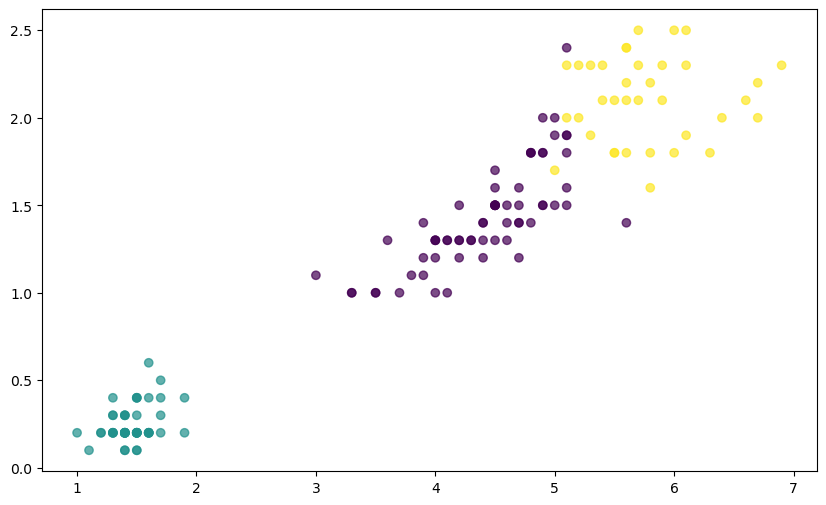

In [18]:
# Let's visualize the newly assigned observations to clusters (not drawn according to real values!!)

plt.scatter(X["petal_length"], X["petal_width"], c= model1.labels_, cmap= "viridis", alpha = 0.7);

In [19]:
clusters = model1.labels_      # I assigned my model predictions to the `clusters` variable.

In [20]:
df["predicted_clusters"] = clusters    # added "predicted_clusters" feature to the original data
df.head()

sepal_length  sepal_width  petal_length  petal_width  predicted_clusters
0           5.1          3.5           1.4          0.2                   1
1           4.9          3.0           1.4          0.2                   1
2           4.7          3.2           1.3          0.2                   1
3           4.6          3.1           1.5          0.2                   1
4           5.0          3.6           1.4          0.2                   1

In [21]:
odf = pd.read_csv("iris.csv")
labels = pd.DataFrame(odf["species"])   # The labels from the expert (extracted from the original dataset)
labels

species
0       setosa
1       setosa
2       setosa
3       setosa
4       setosa
..         ...
145  virginica
146  virginica
147  virginica
148  virginica
149  virginica

[150 rows x 1 columns]

In [22]:
X["predicted_clusters"] = clusters
X["labels"] = labels
X 

# In the table below, both the expert-provided values and our predicted values are in the same data frame.

sepal_length  sepal_width  petal_length  petal_width  predicted_clusters  \
0             5.1          3.5           1.4          0.2                   1   
1             4.9          3.0           1.4          0.2                   1   
2             4.7          3.2           1.3          0.2                   1   
3             4.6          3.1           1.5          0.2                   1   
4             5.0          3.6           1.4          0.2                   1   
..            ...          ...           ...          ...                 ...   
145           6.7          3.0           5.2          2.3                   2   
146           6.3          2.5           5.0          1.9                   0   
147           6.5          3.0           5.2          2.0                   2   
148           6.2          3.4           5.4          2.3                   2   
149           5.9          3.0           5.1          1.8                   0   

        labels  
0       setosa  
1       setosa  
2       setosa  
3       setosa  
4       setosa  
..         ...  
145  virginica  
146  virginica  
147  virginica  
148  virginica  
149  virginica  

[150 rows x 6 columns]

### Cross table Calculation

In [23]:
# compare using cross table (crosstab)

ct = pd.crosstab(X["predicted_clusters"], X["labels"])
ct

labels              setosa  versicolor  virginica
predicted_clusters                               
0                        0          49         15
1                       50           0          0
2                        0           1         35


- **Cluster 0:** 49 correct predictions, but 15 extra predictions are considered incorrect.
- **Cluster 1:** 50 correct predictions.
- **Cluster 2:** 35 correct predictions, with 1 incorrect prediction and 14 missed.

Total errors: 15 + 1 = 16 incorrect results.

## ARI Score

Adjusted Rand Index (ARI) is a metric that measures the similarity between two clusterings. It adjusts the Rand Index to account for the chance grouping of elements. The ARI value ranges from -1 to 1:

- **1:** Perfect agreement between the two clusterings.
- **0:** No better than random clustering.
- **Negative values:** Indicate less agreement than expected by chance.

The closer the ARI is to 1, the more successful and accurate the clustering is.

In [24]:
from sklearn.metrics.cluster import adjusted_rand_score

In [25]:
adjusted_rand_score(X.labels, X.predicted_clusters)  # writing the actual and predicted values

# When calculating the Rand Index score, string and integer values can be compared with each other.

0.7311985567707746

## Visualization Clusters

comparing the actual and predicted values by visualization

In [26]:
# Categorical data is converted into numerical data suitable for analysis.
X_labels = X.labels.map({"versicolor":0, "setosa":1,"virginica":2})
X_labels

0      1
1      1
2      1
3      1
4      1
      ..
145    2
146    2
147    2
148    2
149    2
Name: labels, Length: 150, dtype: int64

In the following two graphs, we will compare the expert's view (actual) and our predicted cluster assignments.

The first graph is plotted based on sepal length and sepal width.

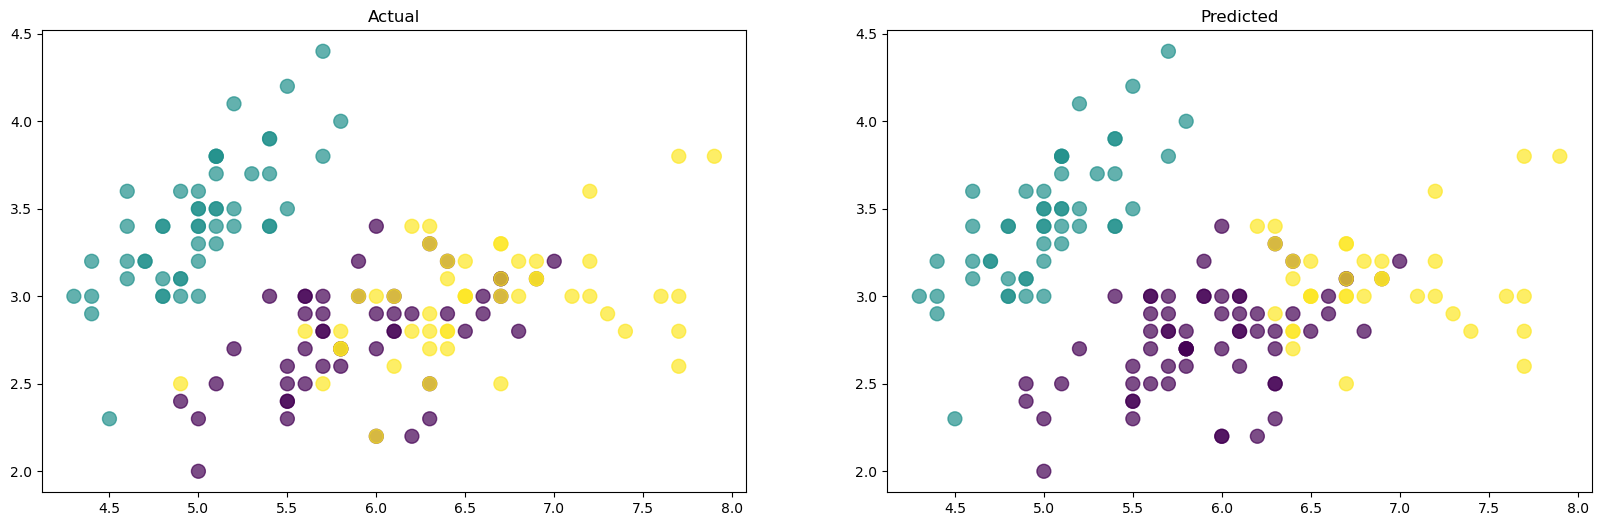

In [27]:
plt.figure(figsize = (20,6))

plt.subplot(121)
plt.scatter(X["sepal_length"], X["sepal_width"], c = X_labels, cmap = "viridis", alpha=0.7, s=100)
plt.title("Actual")

plt.subplot(122)
plt.scatter(X["sepal_length"], X["sepal_width"], c = X.predicted_clusters, cmap = "viridis", alpha=0.7, s=100)
plt.title("Predicted");

We will also plot the clusters based on petal length and petal width. Similar transitions to the ones in the previous graph will be observed.

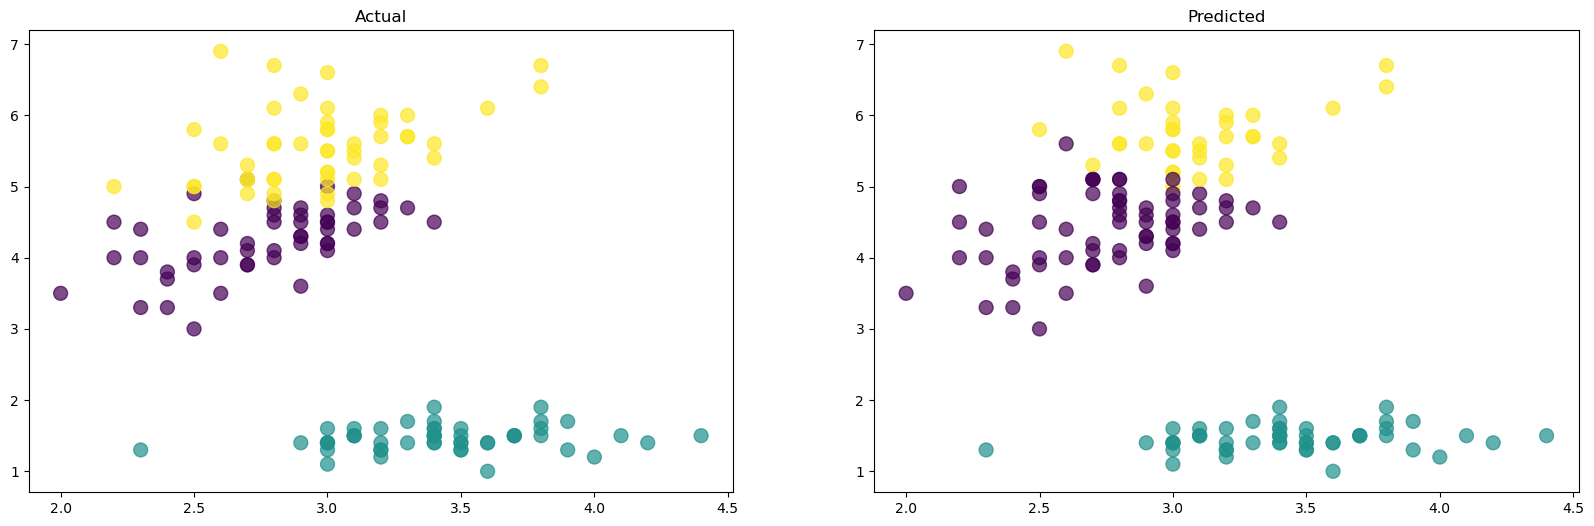

In [28]:
plt.figure(figsize = (20,6))

plt.subplot(121)
plt.scatter(X["sepal_width"], X["petal_length"], c = X_labels, cmap = "viridis", alpha=0.7, s=100)
plt.title("Actual")

plt.subplot(122)
plt.scatter(X["sepal_width"], X["petal_length"], c = X.predicted_clusters, cmap = "viridis", alpha=0.7, s=100)
plt.title("Predicted");

## Remodeling according to discriminating features

We will examine the model's potential for improvement based on the Rand score obtained above and the color overlaps and transitions observed in the graphs (purple-yellow).

let's build the model here again


In [29]:
X.head()

sepal_length  sepal_width  petal_length  petal_width  predicted_clusters  \
0           5.1          3.5           1.4          0.2                   1   
1           4.9          3.0           1.4          0.2                   1   
2           4.7          3.2           1.3          0.2                   1   
3           4.6          3.1           1.5          0.2                   1   
4           5.0          3.6           1.4          0.2                   1   

   labels  
0  setosa  
1  setosa  
2  setosa  
3  setosa  
4  setosa

In [30]:
# Let's calculate the average values of the features using `groupby`.
clus_pred = X.iloc[:, [0, 1, 2, 3, 5]].groupby("labels").mean().T
clus_pred

labels        setosa  versicolor  virginica
sepal_length   5.006       5.936      6.588
sepal_width    3.428       2.770      2.974
petal_length   1.462       4.260      5.552
petal_width    0.246       1.326      2.026

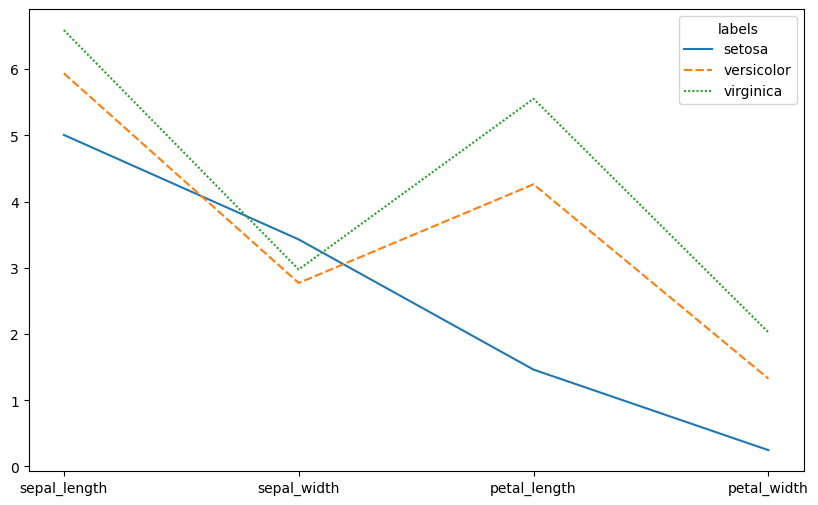

In [31]:
sns.lineplot(data = clus_pred);

**RESULT SENTENCE:** It has been determined that `petal_length` and `petal_width` are the two features that should be selected in the model.

**Additionally, let's draw a BoxPlot to confirm or evaluate our decision for the LinePlot.**

<Axes: xlabel='labels', ylabel='petal_width'>

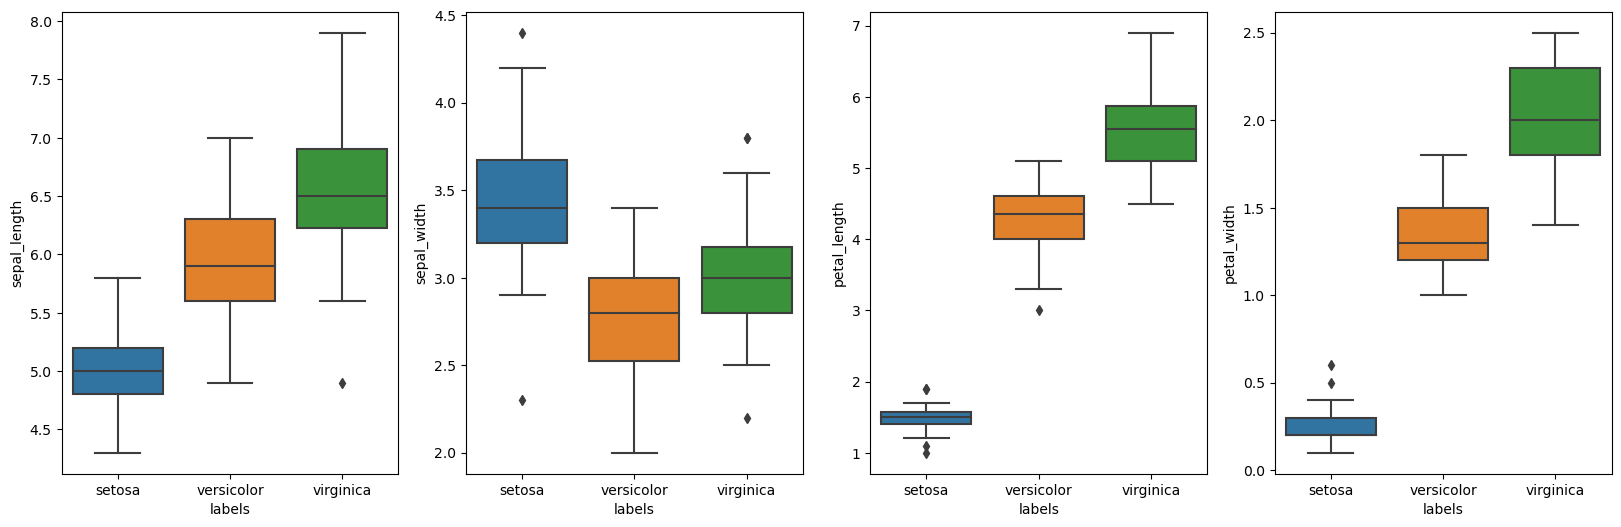

In [32]:
# BOX Plot

plt.figure(figsize = (20,6))
plt.subplot(141)
sns.boxplot(y = "sepal_length", x = "labels", data = X, palette="tab10")
plt.subplot(142)
sns.boxplot(y = "sepal_width", x = "labels", data = X, palette="tab10")
plt.subplot(143)
sns.boxplot(y = "petal_length", x = "labels", data = X, palette="tab10")
plt.subplot(144)
sns.boxplot(y = "petal_width", x = "labels", data = X, palette="tab10")

In the two box plot drawings on the right, it's seen that the features are well separated because the colored borders of the boxes do not overlap. This supports the findings from the LinePlot above.

Setosa is completely separated in all three plots. The second plot shows that versicolor and virginica are densely mixed, while the third and fourth plots provide the best separation.

We will proceed with the analysis using the two features.

### Dendrogram

In [33]:
X2 = X.iloc[:, [2,3]]
X2

petal_length  petal_width
0             1.4          0.2
1             1.4          0.2
2             1.3          0.2
3             1.5          0.2
4             1.4          0.2
..            ...          ...
145           5.2          2.3
146           5.0          1.9
147           5.2          2.0
148           5.4          2.3
149           5.1          1.8

[150 rows x 2 columns]

**NOTE**: Additionally, we could have looked at Hopkins as well. We would have seen it decrease too, but I didn't include it here again.

In [34]:
hc_ward = linkage(y = X2, method = "ward")  # Performs agglomerative hierarchical clustering on the X2 dataset using the 'ward' method.
hc_complete = linkage(X2, "complete")  # Uses the 'complete' or 'maximum' method.
hc_average = linkage(X2, "average")  # Merges clusters using the average distance between all pairs.
hc_single = linkage(X2, "single")  # Uses the 'single' or 'minimum' method, considering the closest points between clusters.


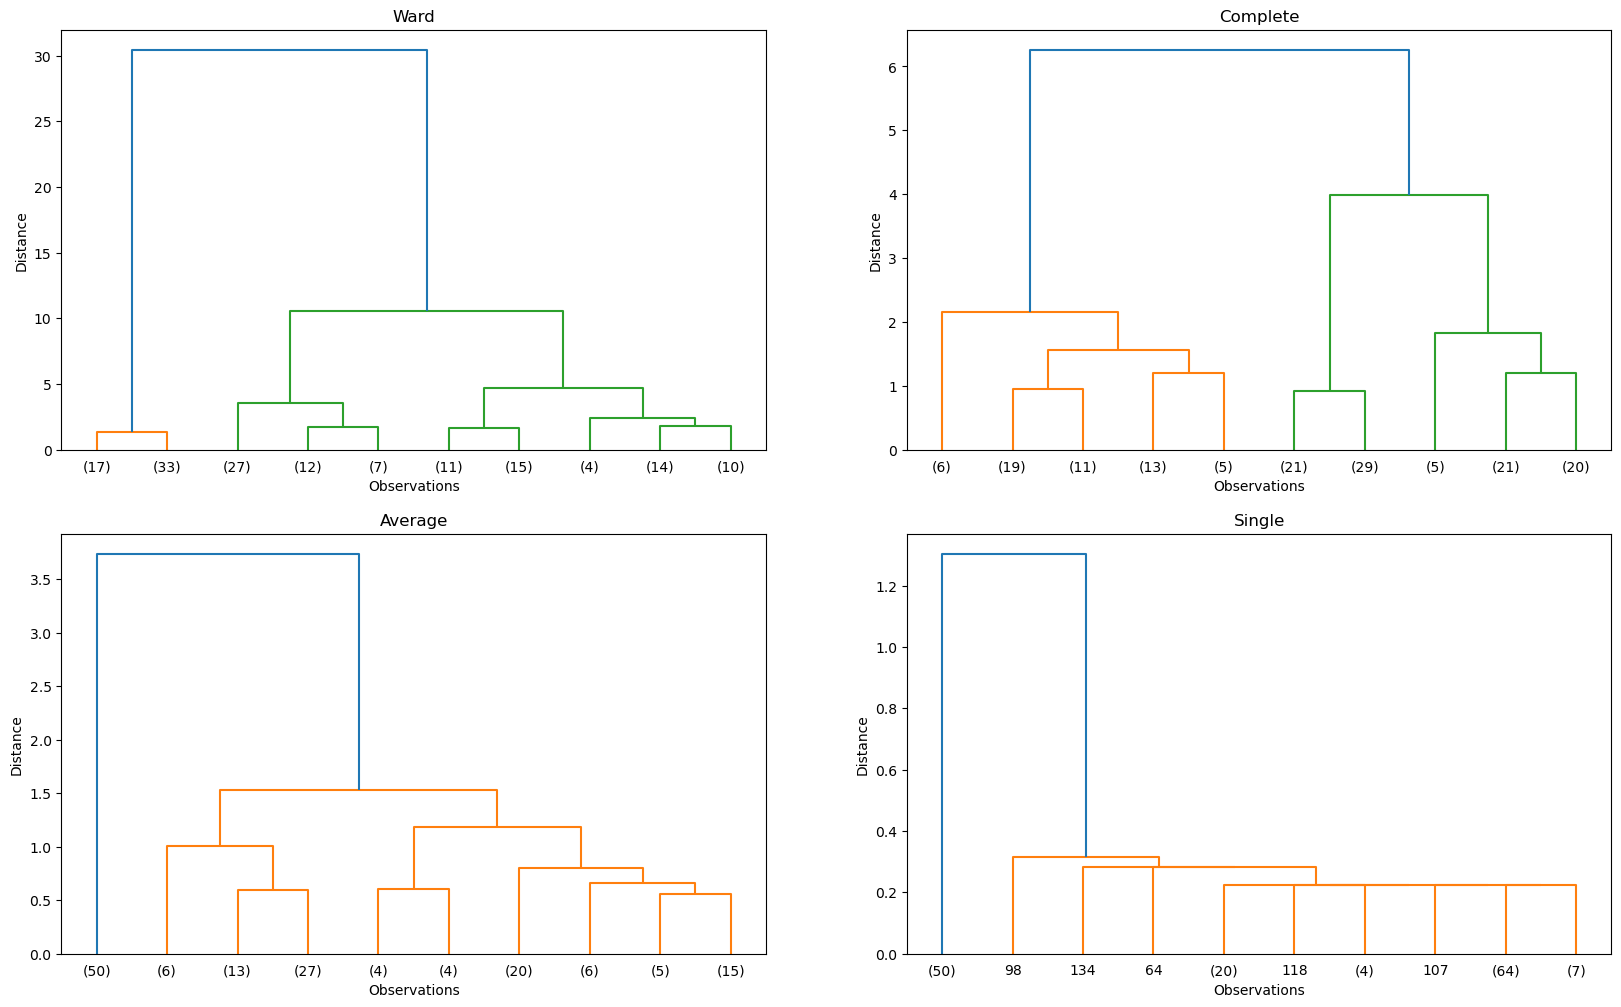

In [35]:
plt.figure(figsize = (20,12))

plt.subplot(221)
plt.title("Ward")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_ward, leaf_font_size = 10, truncate_mode='lastp', p=10)

plt.subplot(222)
plt.title("Complete")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_complete, leaf_font_size = 10, truncate_mode='lastp', p=10)

plt.subplot(223)
plt.title("Average")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_average, leaf_font_size = 10, truncate_mode='lastp', p=10)

plt.subplot(224)
plt.title("Single")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_single, leaf_font_size = 10, truncate_mode='lastp', p=10);

### S(Silhouette) Score

In [36]:
K = range(2,10)

for k in K:
    model = AgglomerativeClustering(n_clusters = k)
    model.fit_predict(X2)
    print(f'Silhouette Score for {k} clusters: {silhouette_score(X2, model.labels_)}')

Silhouette Score for 2 clusters: 0.7669465622893307
Silhouette Score for 3 clusters: 0.6573949270307473
Silhouette Score for 4 clusters: 0.5895284483082736
Silhouette Score for 5 clusters: 0.5781917221789421
Silhouette Score for 6 clusters: 0.574738090950023
Silhouette Score for 7 clusters: 0.5830818101061305
Silhouette Score for 8 clusters: 0.5678904788273494
Silhouette Score for 9 clusters: 0.54699100118714


silhouette_score için öncekine göre iyileşme var

## Final model

In [39]:
final_model = AgglomerativeClustering(n_clusters=3, linkage = "complete")
clusters = final_model.fit_predict(X2)

In [40]:
X2["predicted_clusters"] = clusters
X2["labels"] = labels
X2

petal_length  petal_width  predicted_clusters     labels
0             1.4          0.2                   2     setosa
1             1.4          0.2                   2     setosa
2             1.3          0.2                   2     setosa
3             1.5          0.2                   2     setosa
4             1.4          0.2                   2     setosa
..            ...          ...                 ...        ...
145           5.2          2.3                   0  virginica
146           5.0          1.9                   0  virginica
147           5.2          2.0                   0  virginica
148           5.4          2.3                   0  virginica
149           5.1          1.8                   0  virginica

[150 rows x 4 columns]

### Cross Table for Final model

In [41]:
X2_ct = pd.crosstab(X2["predicted_clusters"], X2["labels"])
X2_ct

# new case..  6 errors

labels              setosa  versicolor  virginica
predicted_clusters                               
0                        0           5         49
1                        0          45          1
2                       50           0          0

In [42]:
ct    # "The table below shows the previous values, with 16 incorrect clusterings."

labels              setosa  versicolor  virginica
predicted_clusters                               
0                        0          49         15
1                       50           0          0
2                        0           1         35

"Let’s visually compare the original and new clustering results below."

In [43]:
X2_labels = X2.labels.map({"versicolor":0, "setosa":1,"virginica":2})
X2_labels

0      1
1      1
2      1
3      1
4      1
      ..
145    2
146    2
147    2
148    2
149    2
Name: labels, Length: 150, dtype: int64

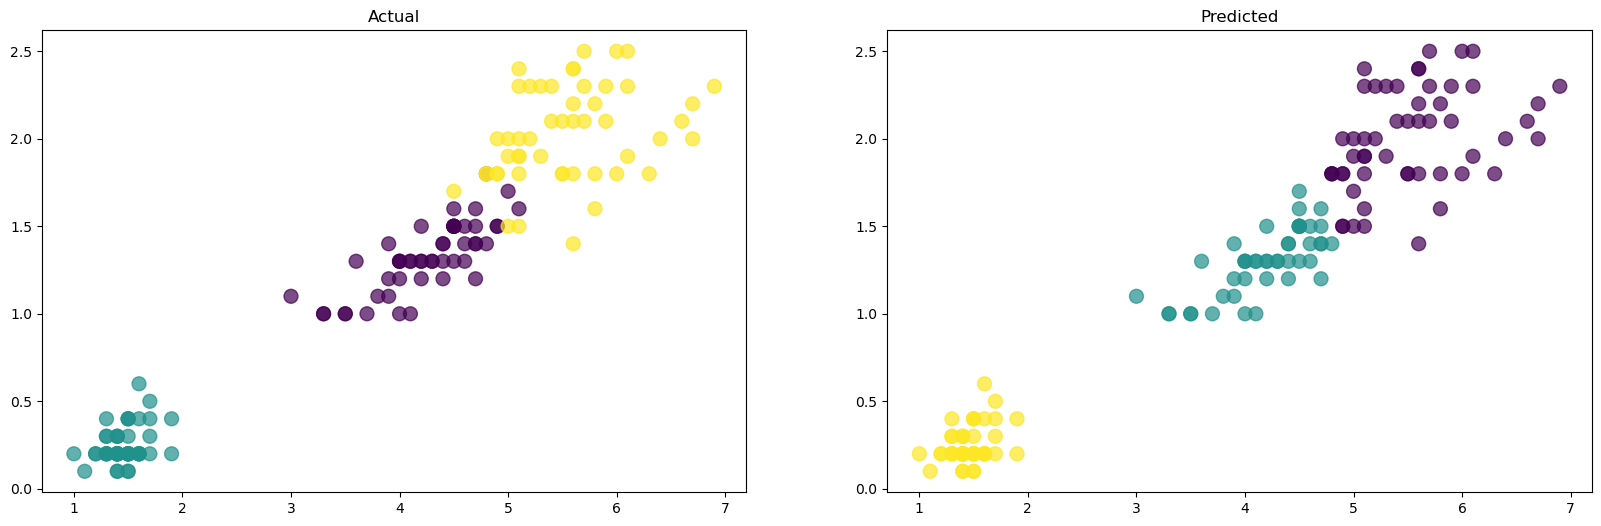

In [44]:
plt.figure(figsize = (20,6))

plt.subplot(121)
plt.scatter(X2["petal_length"], X2["petal_width"], c = X2_labels, cmap = "viridis", alpha=0.7, s=100)
plt.title("Actual")

plt.subplot(122)
plt.scatter(X2["petal_length"], X2["petal_width"], c = X2.predicted_clusters, cmap = "viridis", alpha=0.7, s=100)
plt.title("Predicted");

**NOTE**: Compared to the previous graph, the predicted graph on the right shows better separation.

### ARI Score

In [45]:
adjusted_rand_score(X2.labels, X2.predicted_clusters)

0.8857921001989628

We have observed that the previous Rand score has improved and is now closer to 1.

## Prediction cluster of new data

In [46]:
new_data = [[1.7, 0.2], [2.3, 0.5]]

In [49]:
final_model.predict(new_data)

AttributeError: 'AgglomerativeClustering' object has no attribute 'predict'

Agglomerative doesn't have predict function

To make predictions, you need to add these two new rows at the bottom of the DataFrame and re-input the complete new DataFrame into the model. When new data comes in, we will add it as new rows to the DataFrame and retrain the model.

![hierarchical clustering.gif](<attachment:hierarchical clustering.gif>)
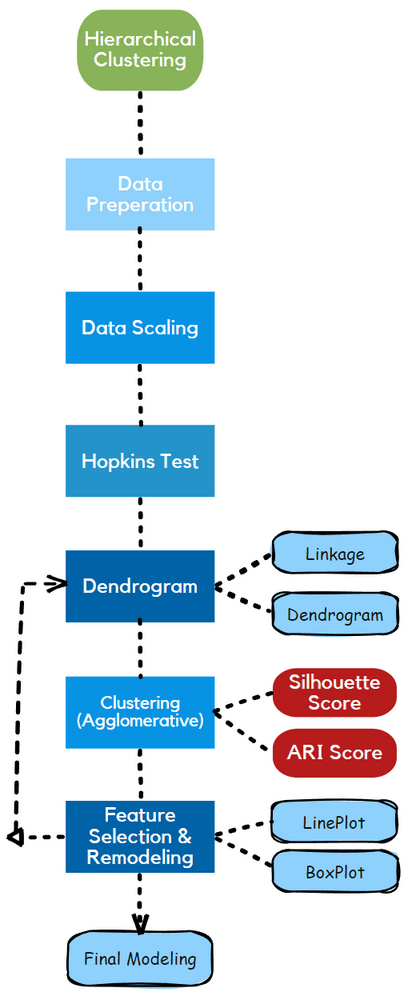
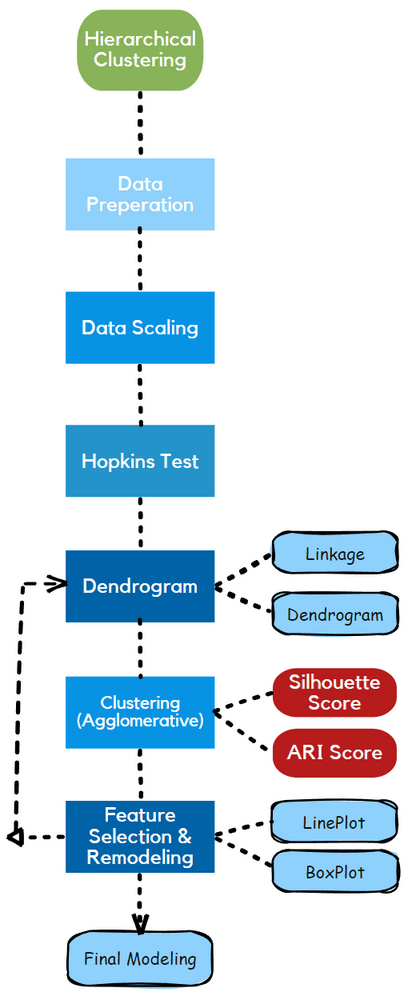